# Code 3
- Numerical & Categorical EDA
  - Outlier Detection and Basic Imputation (Mean/Median/Mode)
- Logistic Model (Balanced/ Unbalanced)

## 1/ Import Libraries

In [ ]:
#CodeSection1
from google.colab import drive
drive.mount('/mntDrive') 

Mounted at /mntDrive


In [ ]:
#CodeSection2
import pandas as pd
import numpy as np

## 2/ Import Data

In [ ]:
#CodeSection3
train = pd.read_csv('/mntDrive/MyDrive/Project MasterMind/1 - Planning Stage/2- Research/6- New Teaching Method/Loan Prediction (Webinar Flow)/Solution Codes/input/train.csv')
test = pd.read_csv('/mntDrive/MyDrive/Project MasterMind/1 - Planning Stage/2- Research/6- New Teaching Method/Loan Prediction (Webinar Flow)/Solution Codes/input/test.csv')

## 3/ Combine both Datasets (train, test)

In [ ]:
#CodeSection4
all_data = [train, test]

### Check Combined Data 
- Missing Value
- Data Types

In [ ]:
#CodeSection5
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        2
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [ ]:
#CodeSection6
# Check Data types for each variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 4/ EDA - Check Numerical Variables

In [ ]:
#CodeSection7
# Lets Import the Seaborn Library
import seaborn as sns

### Lets start with Numerical Variable/Feature - 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


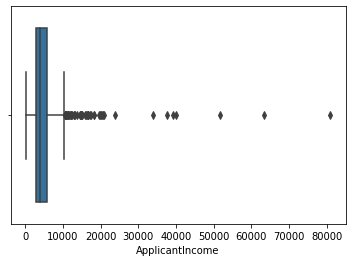

In [ ]:
#CodeSection8
# in this case we start with "ApplicantIncome"
sns.boxplot(train['ApplicantIncome']) 
# Has Outliers

### Inter Quantile Range Strategy 
- Outlier Detection
- Outlier Treatment

In [ ]:
#CodeSection9
# Find Q1 and Q3
Q1 = train['ApplicantIncome'].quantile(0.25)
Q3 = train['ApplicantIncome'].quantile(0.75)

#Find IQR 
IQR = Q3-Q1

#Find Lower Limit and Higher Limit
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

# Print all Values
print('Q1 : {}'.format(Q1))
print('Q3 : {}'.format(Q3))
print('IQR : {}'.format(IQR))
print(Lower_Whisker, Upper_Whisker)

Q1 : 2877.5
Q3 : 5795.0
IQR : 2917.5
-1398.75 11610.0


### Now lets Treat the value by imputing with Mean/Median

In [ ]:
#CodeSection10
# Replace Variable with Upper Whisker (there are other strategies)
for dataset in all_data:
  dataset['ApplicantIncome'] = dataset['ApplicantIncome'].apply(lambda x : Upper_Whisker if x >= Upper_Whisker else x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


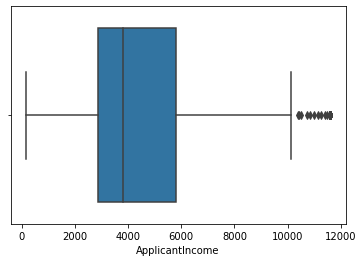

In [ ]:
#CodeSection11
# Lets check again
sns.boxplot(train['ApplicantIncome']) 
# Now No Outliers

### Replicate for other Numerical Variable/Features

In [ ]:
#CodeSection12

# Identify all Numerical Variables 
numerical_features = ['CoapplicantIncome','LoanAmount']

# Write a loop to do the same
for num_var in numerical_features:
  Q1 = train[num_var].quantile(0.25)
  Q3 = train[num_var].quantile(0.75)

  IQR = Q3-Q1

  Lower_Whisker = Q1 - 1.5*IQR
  Upper_Whisker = Q3 + 1.5*IQR

  for dataset in all_data:
    dataset[num_var] = dataset[num_var].apply(lambda x : Upper_Whisker if x > Upper_Whisker else x)

## 5/ Impute Numerical Variables

### Impute all Numerical Variables at once



In [ ]:
#CodeSection13
# Write a loop to Impute all Numerical Vairbales
for dataset in all_data:
  # Numerical Feature 1
  dataset['ApplicantIncome'] = dataset['ApplicantIncome'].fillna(dataset['ApplicantIncome'].median())
  
  # Numerical Feature 2
  dataset['CoapplicantIncome'] = dataset['CoapplicantIncome'].fillna(dataset['CoapplicantIncome'].median())

  # Numerical Feature 3
  dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].median())
  
  # Numerical Feature 4
  dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].median())

  # Numerical Feature 5
  dataset['Credit_History'] = dataset['Credit_History'].fillna(dataset['Credit_History'].median())

## 6/ Impute Categorical Variables
- Lets try another Strategy of Imputing "Missing" where a Category value is missing

### Impute all Categorical Variables at once

In [ ]:
#CodeSection14
for dataset in all_data:
  # Categorical Feature 1
  dataset['Gender'] = dataset['Gender'].fillna('Missing')

  # Categorical Feature 2
  dataset['Married'] = dataset['Married'].fillna('Missing')
  
  # Categorical Feature 3
  dataset['Dependents'] = dataset['Dependents'].fillna('Missing')

  # Categorical Feature 4
  dataset['Self_Employed'] = dataset['Self_Employed'].fillna('Missing')

## 7/ Now Re Check all Features

In [ ]:
#CodeSection15
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

## 8/ Prepare Data for Model Model

In [ ]:
#CodeSection16
# Check First 5 Rows of Test Data
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban


In [ ]:
#CodeSection17
# Get X and y Variables for your Dataset
X = train.drop(['Loan_Status','Loan_ID'], axis =  1)
y = train['Loan_Status']

### Create Dummy Variables for  Categorical Variables

In [ ]:
#CodeSection18
# Get Dummy Variables
X = pd.get_dummies(X)  # Keep only n - 1 Variables - Use "drop_first = True"

## 9/ Build Model

In [ ]:
#CodeSection19
#Import Logistic Regression Library
from sklearn.linear_model import LogisticRegression

#Initialize LR
clf = LogisticRegression(max_iter = 1000)

In [ ]:
#CodeSection20
# Fit Model
model = clf.fit(X, y)

### Check Accuracy of Model on Train Data

In [ ]:
#CodeSection21
# Predict on Train Data
y_pred = model.predict(X)

### We can use a Accuracy Function from Metrics
- Check Train Accuracy

In [ ]:
#CodeSection22
# Import metrics library
from sklearn.metrics import accuracy_score

In [ ]:
#CodeSection23
# get Actual "y" variables (use "y_true" as variable)
y_true = train['Loan_Status']

In [ ]:
#CodeSection24
# Print Train Accuracy
print(f" Train Accuracy : {accuracy_score(y_true, y_pred):0.1%}")

 Train Accuracy : 80.6%


## 10/ Predict using Test X variables for Submitting to Competition

### Prepare X variables From "Test Data"

In [ ]:
#CodeSection25
# Get all the X Variables from the Test Dataset
X_test = test.drop(['Loan_ID'], axis =  1)

In [ ]:
#CodeSection26
#Covert to Dummies
X_test = pd.get_dummies(X_test)

In [ ]:
#CodeSection27
# use this code if the next Code shows error
#X_test['Married_Missing']  = 0

In [ ]:
#CodeSection28
# Predict on X_test Data ("X_test_prep")
X_test_prep = model.predict(X_test)

### Create Submission File

In [ ]:
#CodeSection29
sample_submission = pd.read_csv('/mntDrive/MyDrive/Project MasterMind/1 - Planning Stage/2- Research/6- New Teaching Method/Loan Prediction (Webinar Flow)/Solution Codes/input/sample_submission.csv')
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [ ]:
#CodeSection30
submission = pd.DataFrame({
    'Loan_ID' : test['Loan_ID'],
    'Loan_Status' : X_test_prep
})

### Export Submission File

In [ ]:
#CodeSection31
submission.to_csv('/mntDrive/MyDrive/Project MasterMind/1 - Planning Stage/2- Research/6- New Teaching Method/Loan Prediction (Webinar Flow)/Solution Codes/output/O3_LR_Outlier.csv', index = False)

In [ ]:
# LB Accuracy : 0.7777